# K-means Clustering

In [1]:
import pandas as pd
import warnings 
# import geopandas as gpd
import numpy as np
# from shapely.geometry import Polygon, LineString, Point
warnings.filterwarnings(action='ignore')

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler

# matplotlib 한글 처리
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [2]:
df=pd.read_csv('./Data/경감지표_전처리.csv', encoding='utf-8')
labels= np.array(df['학교명'])
df

,구,학교명,학교코드,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),위도,경도,법정동코드,500미터내_파출소개수,500미터내_CCTV개수
0,강남구,개포고등학교,S010000373,1,1,1,382.4,37.484959,127.059405,1168010300,0,44
1,강남구,경기고등학교,S010000375,1,0,1,152.4,37.517566,127.056074,1168010500,1,48
2,강남구,경기여자고등학교,S010000376,1,1,1,200.0,37.486887,127.065567,1168010300,0,40
3,강남구,국립국악고등학교,S000003540,0,0,0,217.4,37.476230,127.051476,1168010300,1,95
4,강남구,단국대학교부속소프트웨어고등학교,S010000581,0,1,0,300.0,37.495617,127.057767,1168010600,0,87
...,...,...,...,...,...,...,...,...,...,...,...,...
315,성동구,무학여자고등학교,S010000436,1,1,1,253.3,37.556768,127.033599,1120010700,1,106
316,성동구,서울방송고등학교,S010000585,1,1,1,87.6,37.547773,127.011036,1120011300,1,68
317,성동구,성수고등학교,S010005523,1,1,1,406.6,37.547342,127.038253,1120011400,0,17
318,성동구,성수공업고등학교,S010000592,1,0,1,306.5,37.540540,127.051298,1120011500,1,78


In [3]:
school_info = df[['학교명','학교코드']]
school_info

,학교명,학교코드
0,개포고등학교,S010000373
1,경기고등학교,S010000375
2,경기여자고등학교,S010000376
3,국립국악고등학교,S000003540
4,단국대학교부속소프트웨어고등학교,S010000581
...,...,...
315,무학여자고등학교,S010000436
316,서울방송고등학교,S010000585
317,성수고등학교,S010005523
318,성수공업고등학교,S010000592


In [4]:
total=df.loc[:,['내부상담_실시여부','외부상담_실시여부','wee클래스_운영여부','학교폭력_예방교육_평균교육시간(1학급당)','500미터내_파출소개수','500미터내_CCTV개수']]
total

,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수
0,1,1,1,382.4,0,44
1,1,0,1,152.4,1,48
2,1,1,1,200.0,0,40
3,0,0,0,217.4,1,95
4,0,1,0,300.0,0,87
...,...,...,...,...,...,...
315,1,1,1,253.3,1,106
316,1,1,1,87.6,1,68
317,1,1,1,406.6,0,17
318,1,0,1,306.5,1,78


## 표준화

In [5]:
sd = StandardScaler()
total_sd=pd.DataFrame(sd.fit_transform(total))
total_sd.index = labels
total_sd.head()

,0,1,2,3,4,5
개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696
경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648
경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745
국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420
단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323


## 최적 K 개수 산출

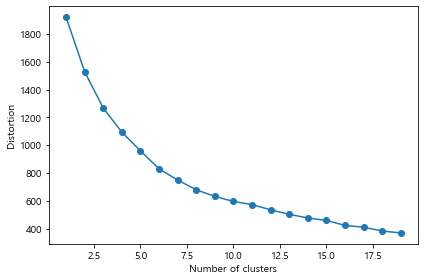

In [6]:
dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,
          init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    k.fit(total_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## k 선택

In [7]:
np.random.seed(1234)
total_sd_arr = total_sd.values

# k값을 5로 설정 후 k-means에 적용시키기
kmeans = KMeans(n_clusters=5, random_state=2021).fit(total_sd_arr)
kmeans.cluster_centers_

array([[ 3.99274705e-01,  5.62914228e-01,  1.95226772e-01,
         5.80960686e-02,  9.65676749e-01, -1.81346543e-01],
       [ 2.46442282e-01, -5.27130890e-02,  1.73979406e-01,
        -1.17121573e-02, -3.31304121e-01,  2.90937075e+00],
       [ 3.99274705e-01,  5.62914228e-01,  2.41016812e-01,
         5.17205647e-03, -8.51361045e-01, -2.81965099e-01],
       [-2.50454133e+00, -3.07554164e-01, -1.10623614e+00,
        -1.46665124e-01,  6.78093326e-02,  1.14590907e-01],
       [ 3.99274705e-01, -1.77646958e+00, -2.11762250e-03,
         9.09854962e-03,  8.12920613e-02, -2.26904419e-01]])

## 군집화

In [8]:
total_sd['cluster'] = kmeans.labels_
total_sd

,0,1,2,3,4,5,cluster
개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696,2
경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648,4
경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745,2
국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420,3
단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323,3
...,...,...,...,...,...,...,...
무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.937053,0
서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.119594,0
성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,-0.977522,2
성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.334715,4


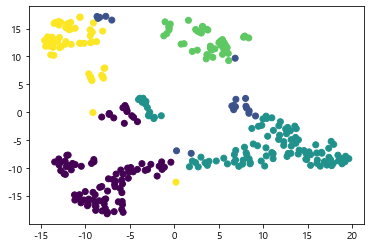

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(total_sd.iloc[:,:6])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

In [10]:
total_sd.reset_index(inplace=True)
total_sd.rename(columns={'index': '학교명', 0: '내부상담_실시여부', 1: '외부상담_실시여부', 2: 'wee클래스_운영여부',
                         3: '학교폭력_예방교육_평균교육시간(1학급당)', 4: '500미터내_파출소개수', 5: '500미터내_CCTV개수'}, inplace=True)
total_sd

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수,cluster
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696,2
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648,4
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745,2
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420,3
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323,3
...,...,...,...,...,...,...,...,...
315,무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.937053,0
316,서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.119594,0
317,성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,-0.977522,2
318,성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.334715,4


In [11]:
total_sd['cluster'].value_counts()
final = pd.merge(total_sd,school_info,on='학교명',how='left')
final.head()

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수,cluster,학교코드
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696,2,S010000373
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648,4,S010000375
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745,2,S010000376
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420,3,S000003540
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323,3,S010000581


In [12]:
Alleviate_score = final.groupby('cluster').mean()

In [13]:
Alleviate_score

,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수
cluster,,,,,,
0,0.399275,0.562914,0.195227,0.058096,0.965677,-0.181347
1,0.246442,-0.052713,0.173979,-0.011712,-0.331304,2.909371
2,0.399275,0.562914,0.241017,0.005172,-0.851361,-0.281965
3,-2.504541,-0.307554,-1.106236,-0.146665,0.067809,0.114591
4,0.399275,-1.776470,-0.002118,0.009099,0.081292,-0.226904


## 결과해석

**0 > 1 > 2 > 4 > 3**

- cluster 0 : 상담/예방시스템 잘되어있고, 파출소 많고 CCTV 무난 => `+ + + + + -` => 전체적으로 높음 => 10점

- cluster 1 : 상담/예방시스템 평범, 파출수적으나 CCTV 매우 많음 => `+ - + - - +` => 전체적으로 낮으나 CCTV 매우 높음 => 8점

- cluster 2 : 상담/예방시스템 잘 되어있으나 파출소, CCTV 적음   => `+ + + + - -` => 전체적으로 높으나 파출소 CCTV 낮음 => 6점

- cluster 3 : 상담/예방시스템 엉망, 파출소, CCTV 보통           => `- - - - + +` => 전체적으로 매우 낮음 => 2점

- cluster 4 : 상담/예방 시스템 별로, 파출소 보통 CCTV 적음      => `+ - - + + -` => 전체적으로 낮음 => 4점

cluster 1과 2의 순서의 경우 CCTV수가 압도적인 1에 높은 점수 부여함

# 경감지표 점수 산출

## 1차 점수 산출

In [14]:
rank = Alleviate_score.sort_values('내부상담_실시여부').index
rank

Int64Index([3, 1, 2, 0, 4], dtype='int64', name='cluster')

In [15]:
final['score_1st'] = ''
for i in range(len(final)):
    if final['cluster'][i]==rank[0]: # 3 => 2
        final['score_1st'][i]= 0.2
    elif final['cluster'][i]==rank[1]: # 1 => 8
        final['score_1st'][i]=0.8
    elif final['cluster'][i]==rank[2]: # 2 => 6
        final['score_1st'][i]=0.6
    elif final['cluster'][i]==rank[3]: # 0 => 10
        final['score_1st'][i]=1
    elif final['cluster'][i]==rank[4]: # 4 => 4
        final['score_1st'][i]=0.4

In [16]:
print(len(final.loc[final['score_1st']==0.2]))
print(len(final.loc[final['score_1st']==0.4]))
print(len(final.loc[final['score_1st']==0.6]))
print(len(final.loc[final['score_1st']==0.8]))
print(len(final.loc[final['score_1st']==1]))

43
56
108
19
94


In [17]:
final

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수,cluster,학교코드,score_1st
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696,2,S010000373,0.6
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648,4,S010000375,0.4
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745,2,S010000376,0.6
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420,3,S000003540,0.2
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323,3,S010000581,0.2
...,...,...,...,...,...,...,...,...,...,...
315,무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.937053,0,S010000436,1
316,서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.119594,0,S010000585,1
317,성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,-0.977522,2,S010005523,0.6
318,성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.334715,4,S010000592,0.4


In [18]:
final.to_csv('./Data/final.csv',encoding='cp949')

## 2차 점수 산출

### 구별 점수

In [19]:
ingu = pd.read_csv('./Data/서울시_청소년인구수_구.txt', delimiter='\t')[['지역','0세-18세']][2:].reset_index(drop=True)
ingu.columns=['구','청소년인구수']

In [20]:
police = pd.read_csv('./Data/경찰관서_2019.csv', encoding='cp949', index_col=0)[1:].reset_index(drop=True)
police['지구대_파출소_총합']=police['경찰서']+police['지구대파출소치안센터']

In [21]:
score_second = pd.merge(police,ingu,how='inner',on='구')

In [22]:
score_second['청소년인구수'] = score_second['청소년인구수'].str.replace(pat=r'[^A-Za-z0-9]', repl= r'', regex=True)
score_second['청소년인구수']= pd.to_numeric(score_second['청소년인구수'])

In [23]:
score_second['구당_청소년수'] = round(score_second['청소년인구수'] / score_second['지구대_파출소_총합'],2)
score_second = score_second[['구','구당_청소년수']]

In [24]:
temp=pd.read_csv('./Data/서울시고등학교_기본정보.csv',encoding='cp949')[['지역','학교명']]
temp.columns=['구','학교명']

In [25]:
score_second = pd.merge(temp, score_second, how='inner', on='구')

In [26]:
score_second

,구,학교명,구당_청소년수
0,강남구,국립국악고등학교,3898.57
1,강남구,개포고등학교,3898.57
2,강남구,경기고등학교,3898.57
3,강남구,경기여자고등학교,3898.57
4,강남구,압구정고등학교,3898.57
...,...,...,...
315,강북구,창문여자고등학교,2322.33
316,강북구,혜화여자고등학교,2322.33
317,강북구,성암국제무역고등학교,2322.33
318,강북구,삼각산고등학교,2322.33


In [27]:
Alleviate_score_2nd = pd.merge(final, score_second,how='left',on='학교명')
Alleviate_score_2nd 

,학교명,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당),500미터내_파출소개수,500미터내_CCTV개수,cluster,학교코드,score_1st,구,구당_청소년수
0,개포고등학교,0.399275,0.562914,0.548464,0.047926,-0.851361,-0.396696,2,S010000373,0.6,강남구,3898.57
1,경기고등학교,0.399275,-1.776470,0.548464,-0.752752,0.560222,-0.310648,4,S010000375,0.4,강남구,3898.57
2,경기여자고등학교,0.399275,0.562914,0.548464,-0.587046,-0.851361,-0.482745,2,S010000376,0.6,강남구,3898.57
3,국립국악고등학교,-2.504541,-1.776470,-1.823273,-0.526473,0.560222,0.700420,3,S000003540,0.2,강남구,3898.57
4,단국대학교부속소프트웨어고등학교,-2.504541,0.562914,-1.823273,-0.238925,-0.851361,0.528323,3,S010000581,0.2,강남구,3898.57
...,...,...,...,...,...,...,...,...,...,...,...,...
315,무학여자고등학교,0.399275,0.562914,0.548464,-0.401498,0.560222,0.937053,0,S010000436,1,성동구,2343.44
316,서울방송고등학교,0.399275,0.562914,0.548464,-0.978335,0.560222,0.119594,0,S010000585,1,성동구,2343.44
317,성수고등학교,0.399275,0.562914,0.548464,0.132172,-0.851361,-0.977522,2,S010005523,0.6,성동구,2343.44
318,성수공업고등학교,0.399275,-1.776470,0.548464,-0.216297,0.560222,0.334715,4,S010000592,0.4,성동구,2343.44


In [28]:
Alleviate_score_2nd['score_2nd']=''
for i in range(len(Alleviate_score_2nd)):
    for k in range(5):
        rank_lis = sorted(list(set(Alleviate_score_2nd[Alleviate_score_2nd['cluster']==k]['구당_청소년수'])), reverse=True) 
        for j in range(len(rank_lis)): #내림차순 정렬한 리스트의 인덱스 순서대로 적은 점수를 차감
            if Alleviate_score_2nd['구당_청소년수'][i] == rank_lis[j]:
                Alleviate_score_2nd['score_2nd'][i] = round((Alleviate_score_2nd['score_1st'][i]-(j/len(rank_lis))*0.2)*10,2) # 점수 만점을 10점으로 만들기

In [29]:
score2_final = Alleviate_score_2nd[['학교명','구','score_2nd']]
score2_final = score2_final.sort_values(by=['score_2nd'], ascending=False)

In [30]:
score2_final.to_csv('./Data/경감지표.csv', index=False, encoding='cp949')